Оглавление
+ [1. Подготовка данных][def]
+ [2. Обучение модели](#Headersssss)
+ [3. Визуализация решающей поверхности][def]
+ [4. Подбор гиперпараметров][def]
+ [4.1 Глубина](##Headers)
+ [4.2 Размер листа](##Headers)
+ [4.3 Разбиение](##Headers)
+ [5. Выводы](#Headersssss)

[def]: #Headers

# 1. Подготовка данных

In [2]:
import os.path
import pandas as pd

In [3]:
my_data = pd.read_csv('train5.csv')
display(my_data.head(30))
my_data.info()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# Целевой признак Transported имеет 2 состояния - True и False, это означает, что дана задача бинарной класификации. 
# Во всех столбцах, кроме целевого, присутствуют пропуски в данных.
# Интересно то, что PassengerId в постфиксе отражает состав семьи, но при этом они могут лететь в разные места, как семья 0020.

## Дубликаты

In [206]:
print(f"В датасете имеется {my_data.duplicated().sum()} дубликатов")

В датасете имеется 0 дубликатов


## Пропуски

In [207]:
# Чтобы принять решения по пропускам в столбцах, посмотрим на уникальные значения

cut_data = my_data.drop(['PassengerId'], axis=1)
for column in cut_data.columns: 
    print(column)
    print(cut_data[column].value_counts(dropna=False))

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64
CryoSleep
False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64
Cabin
NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64
Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 81, dtype: int64
VIP
False    8291
NaN       203
True      199
Name: VIP, dtype: int64
RoomService
0.0       5577
NaN        181
1.0        117
2.0         79
3.0         61
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1274, dtype: int64
FoodCour

In [ ]:
# Целевой признак хорошо сбалансирован.
# HomePlanet, CryoSleep, Destination, Age, VIP - пропуски составляют незначительное количество по сравнению с остальными значениями, 
# поэтому заменим их на моду.
# RoomService, очевидно, означает сумму, на которую в номер заказывались еда и напитки. Пропусков в этом столбце мало (181 из 8693), 
# поэтому заменим их нулями. Аналогично поступим с FoodCourt, ShoppingMall, Spa.
# По VRDeck непонятно, относится ли это к услугам, поэтому оставим как отдельный признак, NaN заменим на преобладающее значение - 0.
# Некоторые имена встречаются по 2 раза, т.е. некоторые пассажиры пользовались услугой перевозки несколько раз. 
# NaN-имена заполним нулями, чтобы выделить в отдельный признак.
# Некоторые каюты использовались несколько раз. Заполним NaN нулями.

In [4]:
import statistics

list = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP']
for col in list:
    mode = statistics.mode(my_data[col])
    my_data[col] = my_data[col].fillna(value=mode)

In [5]:
list1 = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in list1:
    my_data[col] = my_data[col].fillna(0)

In [6]:
my_data['Name'] = my_data['Name'].fillna(0)
my_data['Cabin'] = my_data['Cabin'].fillna(0)

## Новые признаки

Объединим признаки RoomService, FoodCourt, ShoppingMall, Spa в один - 'Services'.

In [7]:
my_data['Services'] = my_data['RoomService'] + my_data['FoodCourt'] + my_data['ShoppingMall'] + my_data['Spa']
my_data = my_data.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa'], axis=1)
my_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,VRDeck,Name,Transported,Services
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,44.0,Juanna Vines,True,692.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,49.0,Altark Susent,False,10334.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,193.0,Solam Susent,False,4983.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,2.0,Willy Santantines,True,1089.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,74.0,Gravior Noxnuther,False,8462.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,3235.0,Celeon Hontichre,False,1402.0


### Выделим семьи из PassengerId
Ряд лиц имеет одинаковый префикс PassengerId, даже с разными фамилиями.
При этом имеются одинаковые фамилии и имена, когда один и тот же пассажир летал несколько раз, поэтому по фамилиям разделять нецелесообразно.

In [8]:
adj_data = my_data['PassengerId'].str.split('_', expand=True)
adj_data.columns=['Prefix', 'Postfix']

In [9]:
# заменим столбец Name префиксом, чтобы потом категоризировать его

my_data['Name'] = adj_data['Prefix']
my_data = my_data.drop(['PassengerId'], axis=1)
my_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,VRDeck,Name,Transported,Services
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0001,False,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,44.0,0002,True,692.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,49.0,0003,False,10334.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,193.0,0003,False,4983.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,2.0,0004,True,1089.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,74.0,9276,False,8462.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,9278,False,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,9279,True,1873.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,3235.0,9280,False,1402.0


## Факторизация признаков

In [10]:
from sklearn.preprocessing import LabelBinarizer

ready_data = pd.get_dummies(my_data, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'])
ready_data['Transported'] = LabelBinarizer().fit_transform(my_data['Transported'])
ready_data

,Age,VRDeck,Transported,Services,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Cabin_0,...,Name_9267,Name_9268,Name_9270,Name_9272,Name_9274,Name_9275,Name_9276,Name_9278,Name_9279,Name_9280
0,39.0,0.0,0,0.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,44.0,1,692.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58.0,49.0,0,10334.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33.0,193.0,0,4983.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,2.0,1,1089.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,74.0,0,8462.0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8689,18.0,0.0,0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8690,26.0,0.0,1,1873.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8691,32.0,3235.0,0,1402.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Проверка готового датасета

In [410]:
ready_data.isna().sum()

Age                 0
VRDeck              0
Transported         0
Services            0
HomePlanet_Earth    0
                   ..
Name_9275           0
Name_9276           0
Name_9278           0
Name_9279           0
Name_9280           0
Length: 12792, dtype: int64

# Обучение модели

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Поскольку нам важна точность определения классов "перевезен" или "нет", выберем метрику accuracy.

## Размеры трейна и теста

In [12]:
X = ready_data.drop(labels=['Transported'], axis=1)
y = ready_data['Transported']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)
print(f"Размер X_train = {X_train.shape}" )
print(f"Размер y_train = {y_train.shape}" )
print(f"Размер X_test = {X_test.shape}" )
print(f"Размер y_test = {y_test.shape}" )

Размер X_train = (6085, 12791)
Размер y_train = (6085,)
Размер X_test = (2608, 12791)
Размер y_test = (2608,)


## DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy_score(predictions, y_test)

0.7131901840490797

## RandomForestClassifier

In [414]:
classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)
classifier.score(X_test, y_test)

0.7323619631901841

In [ ]:
# RandomForestClassifier показывает более высокую точность - на 2%.

# Подбор гиперпараметров

In [15]:
# прогресс-бар

pbar = tqdm(display=False)
iterable = range(100)
pbar.reset(total=len(iterable))  # initialise with new `total`
for i in iterable:
    pbar.update()
pbar.refresh()


True

## max_depth

In [16]:
display(pbar.container)

for max_depth in [1, 3, 5, 10, 20]:
    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    display(accuracy_score(predictions, y_test))

100%|##########| 100/100 [00:02<00:00, 38.23it/s]

0.7296779141104295

0.7427147239263804

0.7446319018404908

0.7373466257668712

0.723159509202454

In [ ]:
# Налиучшая точность у DecisionTreeClassifier наблюдается при глубине 5 - 74.5%.

In [18]:
for max_depth in [40, 60, 80, 100]:
    classifier = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=1, min_samples_split=2,
                       n_estimators=10)

    classifier.fit(X_train, y_train)
    classifier.score(X_train, y_train)
    display(classifier.score(X_test, y_test))

0.7304447852760736

0.7358128834355828

0.7342791411042945

0.7327453987730062

In [ ]:
# У RandomForestClassifier при увеличении глубины с 40 до 100 точность колебалась примерно на одинаковом уровне.

## min_samples_leaf

In [379]:
# Для DecisionTree применим оптимальную глубину 5, установленную на предыдущем шаге

for min_samples_leaf in [1, 20, 40, 60, 80]:
    estimator = DecisionTreeClassifier(
        random_state=42, max_depth=5, min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    print(accuracy_score(predictions, y_test))

0.7446319018404908
0.7442484662576687
0.7419478527607362
0.7361963190184049
0.74079754601227


In [373]:
# применим другую глубину 20

for min_samples_leaf in [20, 40, 60, 80, 100]:
    estimator = DecisionTreeClassifier(
        random_state=42, max_depth=20, min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    print(accuracy_score(predictions, y_test))

0.7250766871165644
0.7381134969325154
0.7350460122699386
0.7381134969325154
0.7392638036809815


In [ ]:
# Результаты хуже, хотя при размере листа 100 почти удалось достичь точности, как на предыдущем шаге: 73,9% против 74,0%.
# В целом при max_depth=5 и min_samples_leaf=1 решающему дереву удалось повысить результат до 74,5%, 
# что выше, чем у случайного леса с начальными параметрами.

In [1]:
# Для RandomForest применим ранее установленную оптимальную глубину 100

for min_samples_leaf in [1, 20, 40, 60, 80]:
    classifier = RandomForestClassifier(max_depth=100, min_samples_leaf=min_samples_leaf, min_samples_split=2,
                       n_estimators=10)

    classifier.fit(X_train, y_train)
    classifier.score(X_train, y_train)
    display(classifier.score(X_test, y_test))

NameError: name 'RandomForestClassifier' is not defined

In [21]:
# увеличим количество деревьев с 10 до 50

for min_samples_leaf in [1, 20, 40, 60, 80]:
    classifier = RandomForestClassifier(max_depth=100, min_samples_leaf=min_samples_leaf, min_samples_split=2,
                       n_estimators=50)

    classifier.fit(X_train, y_train)
    classifier.score(X_train, y_train)
    display(classifier.score(X_test, y_test))

0.7350460122699386

0.7315950920245399

0.7120398773006135

0.7315950920245399

0.7151073619631901

In [ ]:
# Для RandomTree лучше всего подходит минимальный размер листа, равный 1, а количество деревьев не так сильно влияет на точность.

## min_samples_split

In [397]:
# применим наилучший размер листа, полученный на предыдущем шаге - 100.

for min_samples_split in [2, 10, 20]:
    estimator = DecisionTreeClassifier(
        random_state=42, min_samples_leaf=100,
        min_samples_split=min_samples_split
    )
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    print(accuracy_score(predictions, y_test))

0.7392638036809815
0.7392638036809815
0.7392638036809815


In [384]:
# применим малый размер листа к DecisionTree

for min_samples_split in [2, 10, 20]:
    estimator = DecisionTreeClassifier(
        random_state=42, min_samples_leaf=2,
        min_samples_split=min_samples_split
    )
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    print(accuracy_score(predictions, y_test))

0.6970858895705522
0.6913343558282209
0.6882668711656442


In [ ]:
# При большом размере листа у DecisionTree количество разбиений не влияет на точность.
# При малом листе и увеличении числа разбиений точность DecisionTree падает.

In [14]:
# Для RandomForest применим ранее установленный оптимальный размер листа (1)

for min_samples_split in [2, 10, 20, 40]:
    estimator = RandomForestClassifier(
        random_state=42, min_samples_leaf=1, min_samples_split=min_samples_split
    )
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    print(accuracy_score(predictions, y_test))

0.736579754601227
0.7335122699386503
0.7373466257668712
0.7338957055214724


In [ ]:
# У RandomForest точность почти не зависит от числа разбиений.

# Отображение дерева

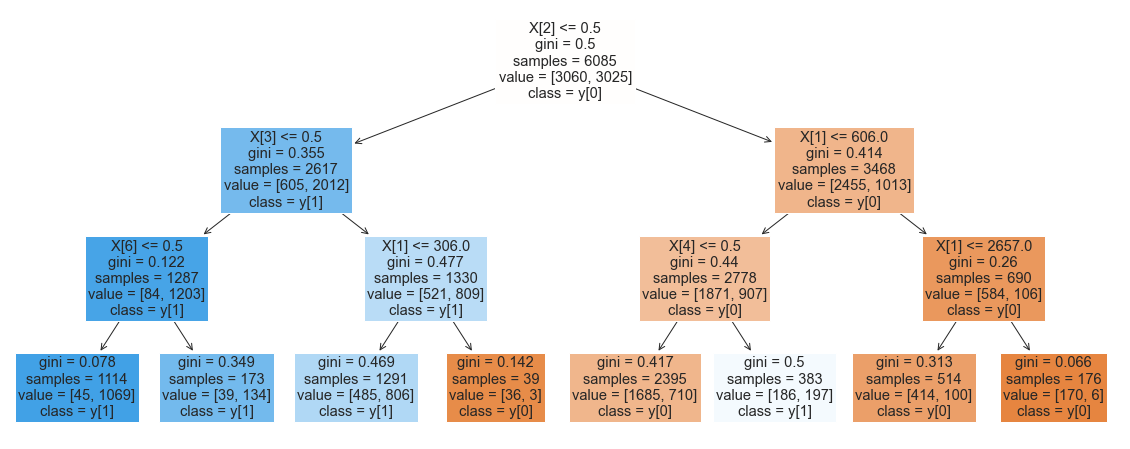

In [399]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

plt.figure(figsize=(20, 8))
tr = tree.plot_tree(decision_tree, class_names=True, filled=True)

# Выводы
Подбор гиперпараметров позволил улучшить точность предсказаний у DecisionTreeClassifier примерно на 2%, до 74,5%.
По результатам подбора для данной задачи оптимальными стали следующие параметры: max_depth=5, min_samples_leaf=100, min_samples_split=2.

Для RandomForestClassifier подбор не оказал существенного влияния, существенно улучшить точность не удалось, она осталась на уровне 73,6%.
Незначительное влияние оказало увеличение количества деревьев.